In [56]:
import numpy as np
import pandas as pd
import wrangle as w

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load your zillow dataset.

opening data from local file


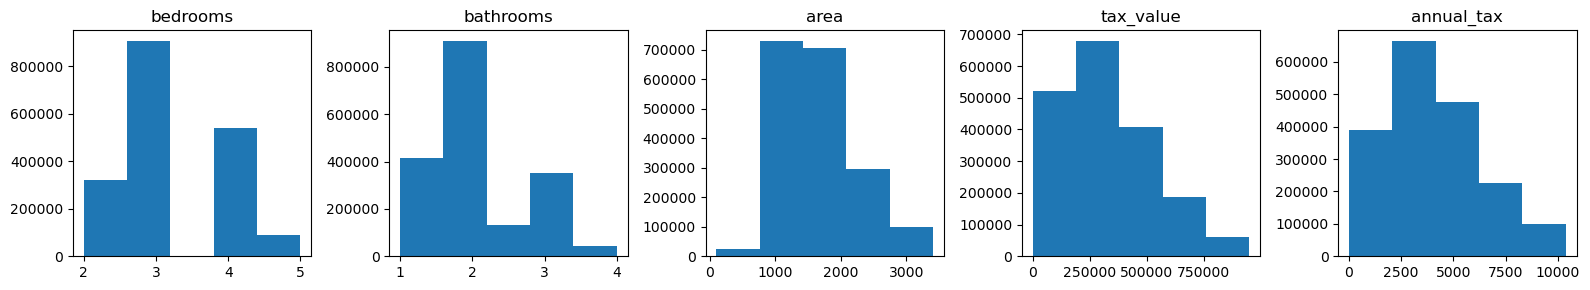

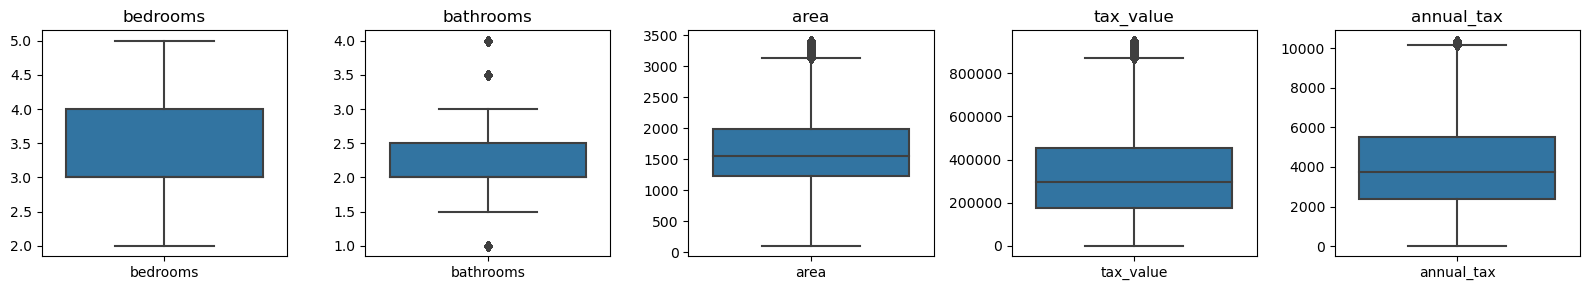

In [2]:
train, val, test = w.wrangle_zillow()

# 2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calculatedfinishedsqft.


In [3]:
X = train[['area']]
y = train.tax_value

In [4]:
# assuming X and y are already defined
model = LinearRegression().fit(X, y)
train['yhat'] = model.predict(X)

# 3. Plot the residuals for the linear regression model that you made.

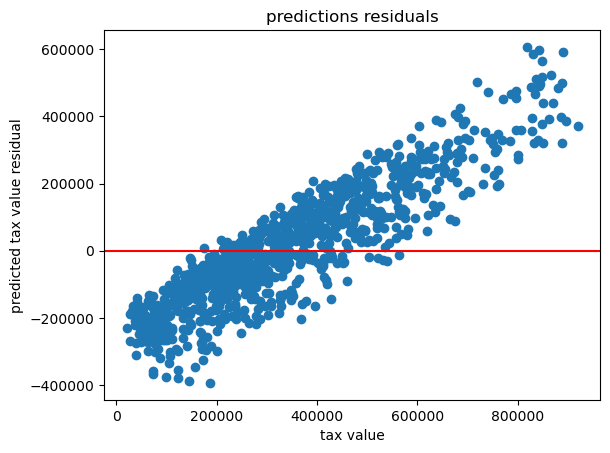

In [57]:
samp = train.sample(1000)
plt.scatter(samp.tax_value, (samp.tax_value - samp.yhat))

# The lineplot is my regression line used for predictions
plt.axhline(0, color='red')

plt.xlabel('tax value')
plt.ylabel('predicted tax value residual')
plt.title('predictions residuals')
plt.show()

# 4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

# 5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).

In [6]:
#baseline 
train['baseline'] = train.tax_value.mean()

In [7]:
train['baseline_residual'] = train.tax_value - train.baseline
train['residual'] = train.tax_value - train.yhat

In [8]:
train

,bedrooms,bathrooms,area,tax_value,year_built,annual_tax,fips,yhat,baseline,baseline_residual,residual
1654597,3,1.0,947,128661,1954,1870.84,6037,222240.691979,327836.255593,-199175.255593,-93579.691979
328510,3,2.0,1076,244696,1950,3160.45,6037,241512.207919,327836.255593,-83140.255593,3183.792081
599581,2,2.0,897,186833,1942,2499.79,6037,214771.112157,327836.255593,-141003.255593,-27938.112157
967268,4,2.5,2520,407094,1977,4680.38,6059,457233.673173,327836.255593,79257.744407,-50139.673173
1495491,3,2.0,1922,134523,1976,1467.24,6059,367897.498504,327836.255593,-193313.255593,-233374.498504
...,...,...,...,...,...,...,...,...,...,...,...
2102829,3,1.0,1090,460811,1939,6322.19,6037,243603.690269,327836.255593,132974.744407,217207.309731
2032417,3,2.5,2233,784244,1978,8701.78,6059,414358.284996,327836.255593,456407.744407,369885.715004
876070,3,1.0,1050,416211,1941,5294.69,6037,237628.026411,327836.255593,88374.744407,178582.973589
1473123,4,2.0,1393,588845,1965,7394.60,6059,288869.343989,327836.255593,261008.744407,299975.656011


In [9]:
train['baseline_residual_2'] = (train.baseline_residual) ** 2
train['residual_2'] = (train.residual) ** 2

In [10]:
# calculate SSE

SSE_baseline = train.baseline_residual_2.sum()
SSE = train.residual_2.sum()
print(f"SSE Baseline = {SSE_baseline: .1f}")
print(f"SSE = {SSE:.1f}")
# 3.3717822865111236e+16

SSE Baseline =  41100731140423432.0
SSE = 33717822865111800.0


In [11]:
# calculate MSE

MSE_baseline = SSE_baseline / len(train)
MSE = SSE / len(train)
print(f"MSE baseline = {MSE_baseline:.1f}")
print(f'MSE = {MSE:.1f}')

MSE baseline = 39578388023.5
MSE = 32468937647.4


In [59]:
MSE2 = mean_squared_error(train.tax_value, train.yhat)
MSE2

32468937647.440643

In [61]:
SSE2 = MSE2 * len(train)
SSE2

3.37178228651118e+16

In [62]:
RMSE2 = MSE2 ** .5
RMSE2

180191.39171292464

In [12]:
# Calculate RMSE = (MSE)^(1/2)

RMSE_baseline = MSE_baseline ** (1/2)
RMSE = MSE ** (1/2)
print("RMSE baseline = ", "{:.1f}".format(RMSE_baseline))
print("RMSE = ", "{:.1f}".format(RMSE))

RMSE baseline =  198943.2
RMSE =  180191.4


In [13]:
# Total Sum of Squares = SSE for baseline

TSS = SSE_baseline
TSS

4.110073114042343e+16

In [14]:
# ESS - Explained Sum of Squares ('Explained Error')

ESS = TSS - SSE
ESS

7382908275311632.0

# 6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [15]:
if SSE < SSE_baseline:
    print('model has a better Sum of Squared Errors than baseline')

model has a better Sum of Squared Errors than baseline


# 7. What is the amount of variance explained in your model?

In [16]:
R_2 = ESS / TSS
R_2

0.17962960926625432

# 8.Is your model better than the baseline model?

In [17]:
from sklearn.metrics import r2_score

In [18]:

R_2_baseline = r2_score(train.tax_value, train.baseline)

In [19]:
if R_2 > R_2_baseline:
    print('model R^2 is better than baseline')

model R^2 is better than baseline


Create a file named evaluate.py that contains the following functions.
- plot_residuals(y, yhat): creates a residual plot
- regression_errors(y, yhat): returns the following values:
 - sum of squared errors (SSE)
 - explained sum of squares (ESS)
 - total sum of squares (TSS)
 - mean squared error (MSE)
 - root mean squared error (RMSE)
- baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
- better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

In [54]:
def plot_residuals(y, yhat):
    plt.scatter(y, (y - yhat))

    plt.axhline(0, color='red')

    plt.xlabel('tax value')
    plt.ylabel('predicted tax value residual')
    plt.title('residual plot')
    plt.show()

In [21]:
def regression_errors(y, yhat): 
    '''takes in array actual and predicted values.
    returns the following values:
    sum of squared errors (SSE)
    explained sum of squares (ESS)
    total sum of squares (TSS)
    mean squared error (MSE)
    root mean squared error (RMSE)'''
    
#     train['residual'] = train.tax_value - train.yhat
#     train['residual_2'] = (train.residual) ** 2
#     SSE = train.residual_2.sum()
    SSE = sum((y - yhat) ** 2)
    
    # Total Sum of Squares = SSE for baseline
#     TSS = SSE_baseline
    TSS = sum((y - y.mean()) ** 2)
    
    # ESS - Explained Sum of Squares ('Explained Error')
    ESS = TSS - SSE
    
    MSE = SSE / len(y)
    
    RMSE = MSE ** (1/2)
    
    return SSE, ESS, TSS, MSE, RMSE

In [22]:
def baseline_mean_errors(y): 
    '''computes the SSE, MSE, and RMSE for the baseline model'''
    SSE = sum((y - y.mean()) ** 2)
    MSE = SSE / len(y)
    RMSE = MSE ** (1/2)
    return SSE, MSE, RMSE

In [23]:
def better_than_baseline(y, yhat): 
    '''returns true if your model performs better than the baseline, otherwise false'''
    SSE = sum((y - yhat) ** 2)
    MSE = SSE / len(y)
    RMSE = MSE ** (1/2)
    
    SSE_base = sum((y - y.mean()) ** 2)
    MSE_base = SSE_base / len(y)
    RMSE_base = MSE_base ** (1/2)
    
    return RMSE < RMSE_base

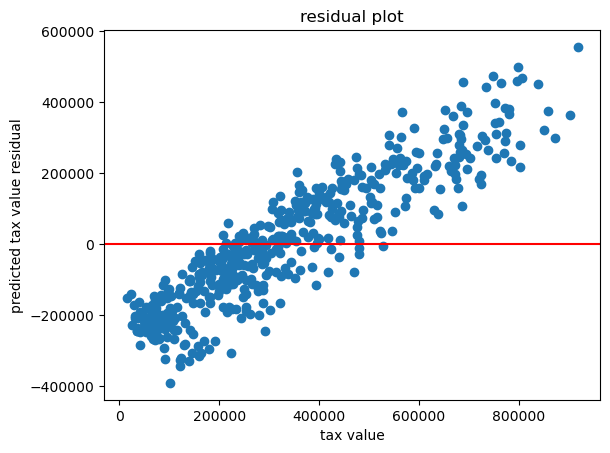

In [55]:
samp = train.sample(500)
plot_residuals(samp.tax_value, samp.yhat)

In [25]:
regression_errors(train.tax_value, train.yhat)

(3.3717822865111236e+16,
 7382908275313548.0,
 4.110073114042478e+16,
 32468937647.4401,
 180191.39171292313)

In [26]:
baseline_mean_errors(train.tax_value)

(4.110073114042478e+16, 39578388023.48929, 198943.17787621994)

In [27]:
better_than_baseline(train.tax_value, train.yhat)

True